# Assignment 3

# Import libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset

In [134]:
df = pd.read_csv('sonar.all-data',header=None)

In [135]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [136]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Label Encoding

In [171]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [175]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Train-Test split

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [177]:
X_train.shape

(156, 60)

In [178]:
X_test.shape

(52, 60)

# Feature Scaling

In [179]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [180]:
X_train

array([[ 0.55755787, -0.29891405,  0.41515573, ..., -0.4267949 ,
         0.10009367, -0.35347414],
       [-1.04478083, -1.10841889, -0.44302384, ..., -0.22144732,
        -0.97786942, -0.66857108],
       [-0.27690106,  0.006207  ,  0.10682774, ...,  0.25243171,
        -0.31206869, -0.78673244],
       ...,
       [-0.25470801, -0.83131916, -0.80273983, ..., -0.50577473,
        -0.24865909, -0.45194193],
       [ 0.38889064, -0.28646013, -0.54066104, ..., -0.36361102,
         0.10009367, -0.03837719],
       [-0.46776135,  0.22103713,  0.08627254, ..., -0.4267949 ,
        -0.09013511, -0.78673244]])

# SVC

In [181]:
from sklearn.svm import SVC
classifier_SVC = SVC(random_state = 0)
classifier_SVC.fit(X_train, y_train)

SVC(random_state=0)

In [182]:
y_pred_SVC = classifier_SVC.predict(X_test)

In [183]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluation(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    return cm, accuracy_score(y_test, y_pred)

In [184]:
print("Confusion Matrix for SVC: ",evaluation(y_test,y_pred_SVC)[0])
print("Accuracy for SVC: {:.2f} %".format(evaluation(y_test,y_pred_SVC)[1]*100))

Confusion Matrix for SVC:  [[25  1]
 [ 8 18]]
Accuracy for SVC: 82.69 %


In [185]:
from sklearn.model_selection import cross_val_score
def k_fold_cv(classifier):
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()*100

In [186]:
k_fold_accuracy = k_fold_cv(classifier_SVC)
print("Accuracy for SVC: {:.2f} %".format(k_fold_accuracy))

Accuracy for SVC: 78.85 %


In [187]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[0.25,0.5,0.75,1,1.5,2],'kernel':['linear']},
              {'C':[0.25,0.5,0.75,1,1.5,2],'kernel':['rbf'],'gamma':['scale','auto',0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
             ]
grid_search = GridSearchCV(estimator=classifier_SVC,
                          param_grid=parameters,
                          scoring = 'accuracy',
                          cv=5,
                          n_jobs=-1)
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_C = best_parameters['C']
best_kernel = best_parameters['kernel']
best_gamma = best_parameters['gamma']

In [188]:
classifier_SVC = SVC(C=best_C,kernel=best_kernel,gamma = best_gamma,random_state = 0)
classifier_SVC.fit(X_train, y_train)
y_pred_SVC = classifier_SVC.predict(X_test)
print("Best Parameters:",best_parameters)
print("Accuracy: {:.2f} %".format(best_accuracy*100))

Best Parameters: {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 87.24 %


In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_SVC))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        26
           1       0.95      0.69      0.80        26

    accuracy                           0.83        52
   macro avg       0.85      0.83      0.82        52
weighted avg       0.85      0.83      0.82        52



In [190]:
from sklearn import metrics
def plot_roc(classifier,X_test,y_test):
    metrics.plot_roc_curve(classifier, X_test, y_test)  
    plt.show()  

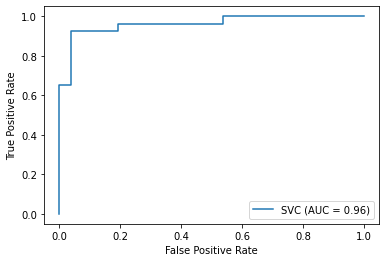

In [191]:
plot_roc(classifier_SVC,X_test,y_test)

# Decision Tree Classifier

In [192]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(random_state = 0)
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [193]:
y_pred_DT = classifier_DT.predict(X_test)

In [194]:
print("Confusion Matrix: ",evaluation(y_test,y_pred_DT)[0])
print("Accuracy for Decision Tree: {:.2f} %".format(evaluation(y_test,y_pred_DT)[1]*100))

Confusion Matrix:  [[22  4]
 [ 6 20]]
Accuracy for Decision Tree: 80.77 %


In [195]:
k_fold_accuracy = k_fold_cv(classifier_DT)
print("Accuracy for DT: {:.2f} %".format(k_fold_accuracy))

Accuracy for DT: 67.30 %


In [196]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_features':['auto','log2']}]  
grid_search = GridSearchCV(estimator=classifier_DT,
                          param_grid=parameters,
                          scoring = 'accuracy',
                          cv=5,
                          n_jobs=1,
                          verbose=0)
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_max_features = best_parameters['max_features']

In [197]:
classifier_DT = DecisionTreeClassifier(max_features=best_max_features,random_state = 0)
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)
print("Best Parameters:",best_parameters)
print("Accuracy: {:.2f} %".format(best_accuracy*100))

Best Parameters: {'max_features': 'log2'}
Accuracy: 67.96 %


In [198]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.78      0.69      0.73        26

    accuracy                           0.75        52
   macro avg       0.75      0.75      0.75        52
weighted avg       0.75      0.75      0.75        52



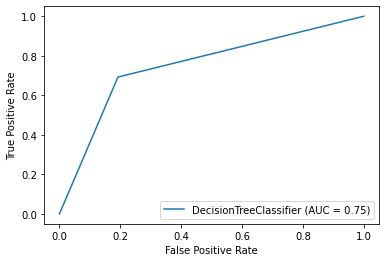

In [199]:
plot_roc(classifier_DT,X_test,y_test)

# Random Forest Classifier

In [200]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(random_state = 0)
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [201]:
y_pred_RF = classifier_RF.predict(X_test)

In [202]:
print("Confusion Matrix: ",evaluation(y_test,y_pred_RF)[0])
print("Accuracy for Random Forest: {:.2f} %".format(evaluation(y_test,y_pred_RF)[1]*100))

Confusion Matrix:  [[26  0]
 [ 5 21]]
Accuracy for Random Forest: 90.38 %


In [203]:
k_fold_accuracy = k_fold_cv(classifier_RF)
print("Accuracy for RF: {:.2f} %".format(k_fold_accuracy))

Accuracy for RF: 81.43 %


In [204]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[10,50,100,200]},
             {'criterion':['gini','entropy']},
              {'max_features':['auto','log2',None]}
             ]
grid_search = GridSearchCV(estimator=classifier_RF,
                          param_grid=parameters,
                          scoring = 'accuracy',
                          n_jobs=1,
                           cv=5,
                          verbose=0)
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_n_estimators = best_parameters['n_estimators']
print("Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:",best_parameters)

Accuracy: 83.37 %
Best Parameters: {'n_estimators': 50}


In [205]:
classifier_RF = RandomForestClassifier(n_estimators = best_n_estimators,random_state = 0)
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [206]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.81      0.89        26

    accuracy                           0.90        52
   macro avg       0.92      0.90      0.90        52
weighted avg       0.92      0.90      0.90        52



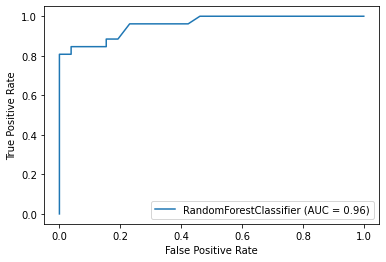

In [207]:
plot_roc(classifier_RF,X_test,y_test)